@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/z5rmY-LV7ME

# Árboles de Decisión
### Padecimientos cardíacos

# Gráfica dispersión: Edad y Colesterol

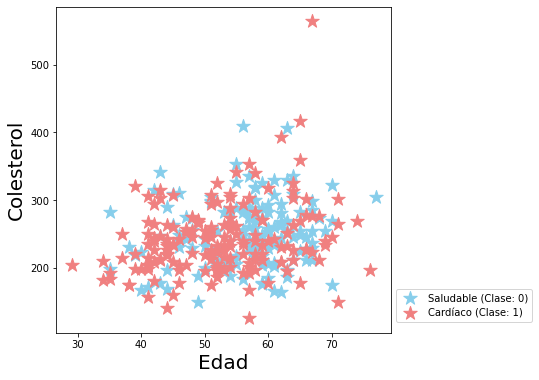

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pacientes = pd.read_csv("pacientes.csv")

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"], 
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()


# Entropía:
#### Promedio de información almacenada en una variable aleatoria

In [2]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))


40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
100    0.5
110    0.5
dtype: float64
2.0
1.0


# Datos de Entrenamiento y Prueba

Este código separa nuestra base de datos en datos de entrenamiento y datos de prueba para saber que tan bueno quedó nuestro modelo de aprendizaje de maquina.

In [3]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]], # Datos de cada uno de los pacientes
    pacientes["problema_cardiaco"],   # Clase asociada a los pacientes (Enfermo o no enfermo)
    test_size=0.30)                   # Para las pruebas vamos a utilizar el 30 % de los datos


# Creación del Árbol de Decisión

Utilizamos la librería de Sklearn e importamos las funciones que nos permiten hacer arboles de desiciones

- tree.DecisionTreeClassifier --> Sirve para predecir clasificadores (Si está enfermo o no)
- tree.DecisionTreeRegressor --> Sirve para predecir valores
- criterion="entropy" --> significa que lo haga por medio del algoritmo de entropia
- max_depth=2 --> ¿cuantas ramas va a tener el arbol?

Recordar que la función .fit() indica los datos de entrada al inicio "X" y luego indicamos los datos de resultados esperados "Y", en este caso los datos de inicio son los datos de entrenamiento y los datos de resultados esperados es la clase (si está enfermo o no)

° Accuracy -> es importante conocer que tan bueno o que tan malo quedó nuestro modelo utilizando los datos de prueba

0.5333333333333333
|--- Edad <= 54.50
|   |--- Colesterol <= 333.00
|   |   |--- class: 1
|   |--- Colesterol >  333.00
|   |   |--- class: 0
|--- Edad >  54.50
|   |--- Edad <= 67.50
|   |   |--- class: 0
|   |--- Edad >  67.50
|   |   |--- class: 1



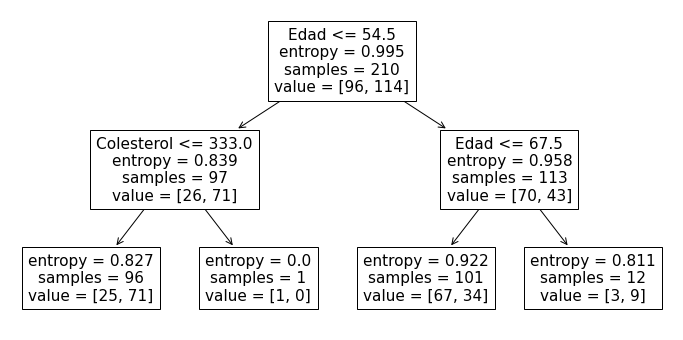

In [6]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy) # ¿que tan bien le fue, que tantos items clasificó correctamente?  --> 0.5333333333333333

print(tree.export_text(arbol,                                   # Representación en texto del arbol
                      feature_names=["Edad", "Colesterol"]))

plt.figure(figsize=(12, 6))
tree.plot_tree(arbol,                                           # Representación gráfica del arbol
              feature_names=["Edad", "Colesterol"])
plt.show()

**Interpretración**
1. el accuracy me muestra que 53.3 % de los items fueron clasificado correctamente
2. El resultado del árbol significa que los items (o pacientes) que tengan una edad menor o igual a 54.50 años van ser dirigidos a las ramas de la izquerda, donde se pregunta si el colesterol es menor o igual a 333, en caso de que esto se cumpla serán asignados a la CLASE = 1 (Enfermo) pero si el colesterol es mayor a 333 serán asignados a la CLASE = 0 (no enfermo)
3. Los items que tengan una edad superior a 54.50 serán arrojados a las ramas de la derecha en el que se vuelven a ver las edades de los pacientes y los que tengan una edad menor o igual a 67.5 será asignados a la CLASE = 0 (no enfermo) pero si la edad es mayor a 67.5 serán asignados a la CLASE = 1 (Enfermo)

# Clasifica a nuevos pacientes
¿ Que pasa si llega un nuevo paciente cuya edad es de 70 años y su colesterol de 150, como podemos predecirlo?

In [9]:
print("Nuevo paciente si es 1 (enfermo) si es 0 (sano) --> ", arbol_decision.predict([[70, 150]]))

Nuevo paciente si es 1 (enfermo) si es 0 (sano) -->  [1]


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>